# Homework 2: DataFrames, Data Visualization, and Functions

## Due Tuesday, April 25 at 11:59PM

Welcome to Homework 2! This week, we will cover DataFrame manipulations, making visualizations, and defining functions. You can find additional help on these topics in  [BPD 6, 9-12](https://notes.dsc10.com/01-getting_started/functions-defining.html) in the `babypandas` notes and [CIT 7-7.3](https://inferentialthinking.com/chapters/07/Visualization.html) in the textbook.

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

**Please do not use for-loops for any questions in this homework.** If you don't know what a for-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

In [139]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import otter
grader = otter.Notebook()

import warnings
warnings.simplefilter('ignore')

## 1. Are You Scared Yet? Analyzing Horror Movies 🎃😱

<center><img src="./images/hocus_pocus.jpg" width = 400/></center>

Spooky season may have passed a few months ago, but it's never too late to watch horror movies! We've provided a file, `data/horror_movies.csv`, that contains information about 464 movies. For each movie, we have 10 pieces of information (see the data description below) that we'll use to generate some insights about the state of horror movies in recent years. 

| Column      | Description |
| ----------- | ----------- |
| `'Title'`      | Title of the movie       |
| `'Country'`   | Country the movie was originally released in        |
| `'Maturity Rating'` | A rating given to the movie by the Motion Picture Association |
| `'Review Rating'` | The IMDb rating of the film, representing how good it was | 
| `'Language'` | The language the movie is in | 
| `'Filming Locations'` | The location in which the movie was filmed |
| `'Budget'` | The total amount spent on the movie |
| `'Release Month'` | The month the movie was released |
| `'Release Day'` | The day the movie was released |
| `'Run Time'` | The length of the film in minutes |

Run the cell below to read the file containing all of the horror movies into a DataFrame called `horror`.

In [140]:
horror = bpd.read_csv('data/horror_movies.csv') 
horror

,Title,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
0,Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
1,Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
2,Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
3,Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
4,Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...,...
459,Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
460,The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
461,13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93
462,Victor Frankenstein (2015),USA,PG-13,6.0,English,"London, England, UK",40000000,November,25,110


**Question 1.1.** Examine the columns available in `horror` and consider which would be the best choice of index for this DataFrame. Change the `horror` DataFrame so that it's indexed by the values in this column instead of the default index.

In [141]:
horror = horror.set_index("Title")
horror

,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
Title,,,,,,,,,
Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...
Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93


In [142]:
grader.check("q1_1")

q1_1 results: All test cases passed!

_Note:_ If you were to run the cell where you set the index of `horror` again, you'd see an error message. Stop and think about _why_ you'd run into an error. Once you've thought about it, click the thinking emoji below to see the reason for the error.

<br>

<details>
    <summary>Why would there be an error? 🤔</summary>
    There would be an error since you'd be trying to set the index of <code>horror</code> to a column that no longer exists in <code>horror</code> – the column wouldn't exist because it was converted to the index the first time you ran the cell (and the index is not a column)!
</details>

If you acually ran the cell twice and got an error message, don't worry. To get rid of it, re-run the cell in 1.1 where you defined the `horror` DataFrame, then run the cell in 1.2 just once, and you'll be good to go.

When you submit your work for autograding, the entire notebook will be run from start to finish. Each cell will run only once, so it's no problem if your code errors on the second run. In this case, it means you're doing something right!

**Question 1.2.** *Dream Nightmare*, released in 2016, is one of the three lowest-budget movies in our dataset. What is the budget of `'Dream Nightmare (2016)'`, and what is its `'Review Rating'`? Assign your answers to variables `DN_budget` and `DN_rating`, respectively.

In [143]:
DN_budget = horror.loc["Dream Nightmare (2016)", 'Review Rating']
DN_rating = float(horror.loc["Dream Nightmare (2016)", 'Budget'])
print("The budget for Dream Nightmare was", DN_budget, "and the rating was", DN_rating)

The budget for Dream Nightmare was 8.0 and the rating was 500.0


In [144]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Assign `lowest_rated_movie` to the name of the movie with the lowest `'Review Rating'` (including the year in parentheses), and set the `'Review Rating'` of that movie to `lowest_rating`.

In [145]:
sorted_lowest = horror.sort_values(by = "Budget")
lowest_rated_movie = sorted_lowest.index[0]
lowest_rating = horror.get('Review Rating').min()
print("The lowest-rated movie is", lowest_rated_movie, "with a rating of", lowest_rating)

The lowest-rated movie is Slash 2 (2014) with a rating of 1.6


In [146]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** That's a very low rating, but how does that compare to the other movies included in the dataset? First, plot a density histogram that shows the distribution of `'Review Rating'`. Then compute the difference between the lowest rating and the **median** movie rating, and assign the result to the variable `below_med`.

When plotting your histogram, remember to set `density=True` and `ec='w'`. You don't have to set the `bins` argument.

-3.4

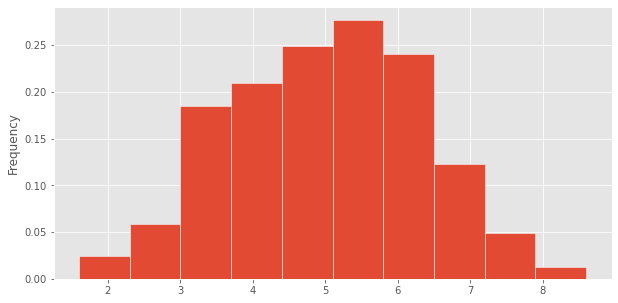

In [147]:
# Create your histogram here.
horror.get('Review Rating').plot(kind = "hist", density=True, ec='w')

# Then calculate below_med.
below_med = lowest_rating-(horror.get('Review Rating').median())
below_med

In [148]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** How many movies in our dataset were released in April and have been given a `'Maturity Rating'`? Note that movies without a `'Maturity Rating'` appear as either `'NOT RATED'` or `'UNRATED'`.  Set the number of such movies equal to the variable `apr_rated_count`.

In [149]:
apr_rated_count = horror[(horror.get("Release Month") == "April") & ((horror.get("Maturity Rating") != 'NOT RATED') & (horror.get("Maturity Rating") != 'UNRATED'))].shape[0]
apr_rated_count


19

In [150]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Which movie titles contain the word `'night'`, with any capitalization? Create an *array* called `night_movies` containing the titles of all such movies, capitalized exactly as they appear in the DataFrame. 

*Hints:*
- To convert a Series into an array, call the function `np.array` on the Series.
- The movie names are all strings, so they may have inconsistencies in how they're capitalized. We want to count movie titles with the words `'Night'`, `'night'`, and even `'NiGHt'`. If we want to account for variations in capitalization, what operation should we call on the movie names **first**? (You may end up using `.str` twice! [This video](https://www.youtube.com/watch?v=TCcEhVA6Euw&list=PLDNbnocpJUhbczUw2Rw6bqreEECMvZ8gN&index=2) and [this section of Lecture 6](https://dsc10.com/resources/lectures/lec06/lec06.html#How-do-we-include-songs-with-other-artists,-as-well?) may help.)

In [151]:
night_movies = np.array(horror[horror.index.str.lower().str.contains('night')].index)
night_movies

array(['Silent Night, Bloody Night: The Homecoming (2013)',
       'Dream Nightmare (2016)', "Hyde's Secret Nightmare (2011)",
       'Night Terrors (2014)', "All Sinner's Night (2014)",
       'Darkest Night (2012)', 'Evil Night (2014)',
       'Darker Than Night (2014)',
       'Poultrygeist: Night of the Chicken Dead (2006)',
       'It Comes at Night (2017)'], dtype=object)

In [152]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** What proportion of movies in our dataset were originally released in each country? Create a DataFrame indexed by `'Country'` with one column called `'Proportion'` containing the proportion of movies in the dataset that were released in that country. Order the rows in descending order of `'Proportion'` and assign this DataFrame to `country_proportions`.

*Hints:*
- Proportions can be easily calculated from counts.
- If you pass in a **list** of columns names to `.get()`, the result will be a DataFrame containing only the columns specified in the list. 

In [153]:
country_counts = horror.groupby('Country').count().get('Maturity Rating')
total_movies = horror.shape[0]
country_proportions_series = country_counts / total_movies
country_proportions = bpd.DataFrame().assign(Proportion=country_proportions_series).sort_values(by='Proportion', ascending=False)
country_proportions


,Proportion
Country,
USA,0.756466
UK,0.058190
Japan,0.015086
Kuwait,0.012931
Philippines,0.012931
...,...
Denmark,0.002155
Belarus,0.002155
Bahrain,0.002155


In [154]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8**  Create a horizontal bar chart that displays the median `'Review Rating'` for each country. Sort the bars so the country that with the lowest median appears at the very top, and the country with the highest median appears at the bottom.

_*Hint*_: To get the bar chart to display nicely, try adding the keyword argument `figsize=(10, 10)`.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_8
manual: True
-->

<AxesSubplot:ylabel='Country'>

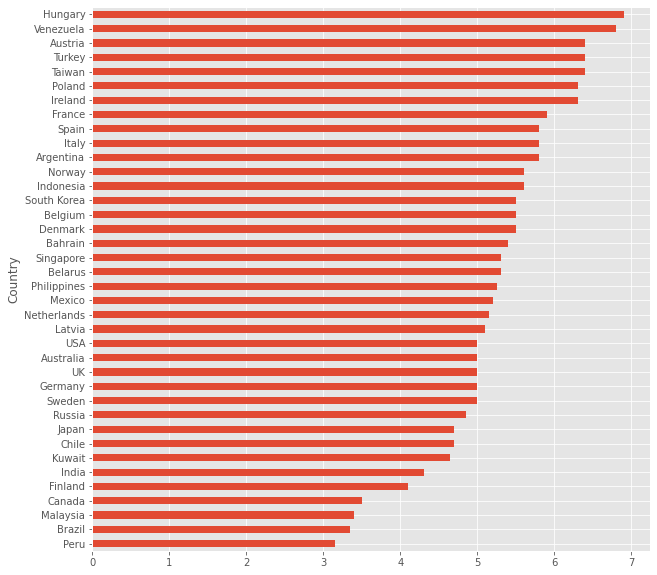

In [155]:
median_ratings = horror.groupby('Country').median().get('Review Rating').sort_values()
median_ratings.plot(kind='barh', figsize=(10, 10))

<!-- END QUESTION -->



## 2. Shine Bright Like a Diamond 💎

In this section, we're going to be working alongside Jack the Jeweler to learn more about the diamond business! The data in `data/diamonds.csv` contains details about 10,000 diamonds, including the quality, dimensions, and price. The information about these diamonds can help Jack get a better understanding about what is valued most in the diamond business. The columns are described below:

| Column      | Description |
| ----------- | ----------- |
| `'carat'`      | The number of carats of the diamond       |
| `'cut'`   | The cut quality of the diamond   |
| `'color'` | The color of the diamond |
| `'clarity'` | The clarity of the diamond | 
| `'price'` | The diamond's price |
| `'x'` | The length of the diamond, in mm |
| `'y'` | The width of the diamond, in mm |
| `'z'` | The depth of the diamond, in mm |

Run the cell below to read in the data.

In [156]:
diamonds = bpd.read_csv('data/diamonds.csv')
diamonds

,carat,cut,color,clarity,price,x,y,z
0,2.04,Very Good,J,SI2,9482,8.07,8.04,5.11
1,0.59,Very Good,H,VVS2,1771,5.39,5.48,3.32
2,0.34,Very Good,H,VS2,689,4.45,4.39,2.80
3,1.01,Good,H,SI2,3888,6.32,6.35,4.05
4,0.50,Ideal,D,VS2,1635,5.10,5.13,3.19
...,...,...,...,...,...,...,...,...
9995,0.32,Premium,G,VS2,561,4.33,4.38,2.70
9996,0.41,Good,J,IF,1061,4.75,4.72,3.01
9997,0.30,Ideal,G,VS2,545,4.35,4.38,2.67
9998,1.25,Premium,J,SI2,4018,6.98,6.95,4.27


**Question 2.1.** One of the first things that Jack learned about when entering the diamond business was the *depth percentage* measurement. The depth percentage of a diamond is ratio of the depth to the mean of the width and length, times 100:

$$\text{depth percentage} =\dfrac{\text{depth (in mm)}}{\text{mean of width and length (in mm)}} \cdot 100$$
    
Assign to the variable `depth_percentage` a Series with the depth percentage of each diamond in `diamonds`. Then, add a column named `'depth_percentage'` containing this Series to the `diamonds` DataFrame.

In [157]:
depth_percentage = diamonds.get('z') / ((diamonds.get('x') + diamonds.get('y')) / 2) * 100
diamonds = diamonds.assign(depth_percentage=depth_percentage)
diamonds

,carat,cut,color,clarity,price,x,y,z,depth_percentage
0,2.04,Very Good,J,SI2,9482,8.07,8.04,5.11,63.438858
1,0.59,Very Good,H,VVS2,1771,5.39,5.48,3.32,61.085557
2,0.34,Very Good,H,VS2,689,4.45,4.39,2.80,63.348416
3,1.01,Good,H,SI2,3888,6.32,6.35,4.05,63.930545
4,0.50,Ideal,D,VS2,1635,5.10,5.13,3.19,62.365591
...,...,...,...,...,...,...,...,...,...
9995,0.32,Premium,G,VS2,561,4.33,4.38,2.70,61.997704
9996,0.41,Good,J,IF,1061,4.75,4.72,3.01,63.569166
9997,0.30,Ideal,G,VS2,545,4.35,4.38,2.67,61.168385
9998,1.25,Premium,J,SI2,4018,6.98,6.95,4.27,61.306533


In [158]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Depth percentage is important to jewelers because it determines how light refracts through the stone, which in turn affects the visual appearance of the diamond. Diamonds that are too shallow have grey rings (called "fish eyes" 🐟 ), and diamonds that are too deep have dark spots in the middle (called "nail heads" 🔨). The ideal depth percentage for a diamond is between 54 and 66 percent, inclusive. These diamonds really sparkle! ✨

<center><img src=images/depth_percentage.jpg width=500>
(<a href="https://www.ori-diamonds.com/blog/diamond-depth">source</a>)</center>

**Question 2.2.** Jack is curious as to how common ideally proportioned diamonds actually are. Calculate the proportion of diamonds that have an ideal depth percentage (between 54 to 66 percent, inclusive) and set the result to the variable `ideal_prop`.

In [159]:
ideal_prop = diamonds[(diamonds.get('depth_percentage') >= 54) & (diamonds.get('depth_percentage') <= 66)].shape[0] / diamonds.shape[0]
ideal_prop


0.9928

In [160]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Jack has been taught that the depth percentage has an impact on the visual impact of a diamond, which he suspects also affects the price. Create a scatter plot showing how the price of a diamond varies with its depth percentage.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
manual: True
-->

<AxesSubplot:xlabel='depth_percentage', ylabel='price'>

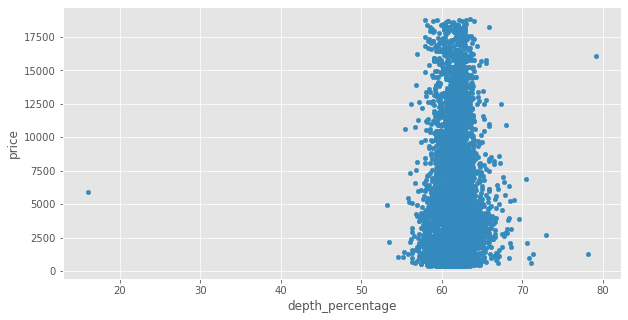

In [161]:
# Create your scatter plot here.
diamonds.plot(kind='scatter', x='depth_percentage', y='price')

<!-- END QUESTION -->



Hmm... perhaps there's a bit more to diamond pricing than just depth percentage! Jack explains that there are four common measures of the quality of a diamond, sometimes called the 4 C's: `'carat'`, `'cut'`, `'clarity'`, and `'color'`.

1) The `'carat'` simply measures the weight of the diamond. 

2) The `'cut'` is related to the depth proportion, and is considered either Ideal, Premium, Very Good, Good, or Fair (in descending order of quality).

3) The `'clarity'` describes whether the diamond has any flaws. In descending order of quality, the values of `'clarity'` in our dataset are `'IF'` (which stands for "internally flawless"), `'VVS1'`, `'VVS2'`, `'VS1'`, `'VS2'`, `'SI1'`, `'SI2'`, and `'I1'`.

<br>

<center><img src=images/clarity.jpg width=400>
(<a href="https://www.petragems.com/education/diamond-clarity/">source</a>)</center>

4) The `'color'` of each diamond in our dataset is described by a letter between `'D'` and `'J'`, where `'D'` represents a diamond with no color, and `'J'` represents a diamond with some color to it. Diamonds with less color are considered higher quality.

<center><img src=images/color.jpg width=200>
(<a href="https://bashertjewelry.com/pages/diamonds-color-grading">source</a>)</center>

The `'carat'` column of `diamonds` contains numerical data, but the columns for the other 3 C's contain ordered categorical data. Since the data has an order to it, we can convert the values in those columns into numerical values, to make for easier comparisons. For example, if we assign all the values of `'J'` in the `'color'` column to 1, all the values of `'I'` in the `'color'` column to 2, etc., we'll more easily be able to search for diamonds where the color is better than an `'F'` (we could search for color values greater than 5).

For each of `'cut'`, `'clarity'`, and `'color'`, let's translate the data from categorical values to numerical values. For all three of these quality measures, we'll use the number 1 to represent the lowest quality category, and we'll count up from there by one for each category. For example, the numbers for `'clarity'` will range from 1 (for `'I1'`-rated diamonds) to 8 (for internally flawless, or `'IF'`-rated diamonds).


One way to do this conversion is to use a Python [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm).  A dictionary is a simple way to map a unique key to a value.  For example, the dictionary below maps course codes to course names.

In [162]:
dsc_courses = {
    # key: value
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [163]:
dsc30_name = dsc_courses['DSC 30']
dsc30_name

'Data Structures and Algorithms for Data Science'

Here, `'DSC 30'` is the key and `'Data Structures and Algorithms for Data Science'` is the value.

Use dictionaries to help in categorical to numerical value conversions. For example, below is a dictionary containing each category in `'clarity'` as keys and numbers 1-8 as values.

In [164]:
clarity_nums = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}

**Question 2.4.** Create three functions, called `cut_numerical`, `clarity_numerical` and `color_numerical`, where each function takes in a string value describing the categorical quality for the `'cut'`, `'clarity'`, or `'color'`, respectively, and outputs the corresponding numerical value, as described above.

*Hint*: When implementing `clarity_numerical`, you can use the dictionary `clarity_nums` defined above; if you do so, your implementation of `clarity_numerical` should only take one line of code. When implementing the other two functions, you may want to define your own dictionaries. There is a way to implement these functions that doesn't involve dictionaries, but you'll find that the dictionary approach is much more concise.

In [165]:
def cut_numerical(cut):
    cut_nums = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
    return cut_nums[cut]

def clarity_numerical(clarity):
    clarity_nums = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}
    return clarity_nums[clarity]

def color_numerical(color):
    color_nums = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
    return color_nums[color]


In [166]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Now, replace the categorical values in the `'cut'`, `'clarity'`, and `'color'` columns of `diamonds` with their numerical equivalents.

_Hint_: You can use the `.assign` method to replace values in a column, without having to create additional columns.

In [167]:
diamonds = diamonds.assign(cut=diamonds.get('cut').apply(cut_numerical),
                           clarity=diamonds.get('clarity').apply(clarity_numerical),
                           color=diamonds.get('color').apply(color_numerical))

diamonds

,carat,cut,color,clarity,price,x,y,z,depth_percentage
0,2.04,3,1,2,9482,8.07,8.04,5.11,63.438858
1,0.59,3,3,6,1771,5.39,5.48,3.32,61.085557
2,0.34,3,3,4,689,4.45,4.39,2.80,63.348416
3,1.01,2,3,2,3888,6.32,6.35,4.05,63.930545
4,0.50,5,7,4,1635,5.10,5.13,3.19,62.365591
...,...,...,...,...,...,...,...,...,...
9995,0.32,4,4,4,561,4.33,4.38,2.70,61.997704
9996,0.41,2,1,8,1061,4.75,4.72,3.01,63.569166
9997,0.30,5,4,4,545,4.35,4.38,2.67,61.168385
9998,1.25,4,1,2,4018,6.98,6.95,4.27,61.306533


In [168]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6.** One of Jack's customers comes into Jack's store asking for a diamond whose `'cut'` is `'Premium'` or better, and whose `'color'` is `'F'` or better. The customer only has $500 to spend on a diamond. Assign `customer_choices` to a DataFrame of all the diamonds in `diamonds` that fit the customer's criteria and budget.

In [169]:
customer_choices = diamonds[((diamonds.get('cut') == 'Premium') | (diamonds.get('cut') == 'Ideal')) & 
                            ((diamonds.get('color') == 'F') | (diamonds.get('color') == 'E') | (diamonds.get('color') == 'D')) & 
                            (diamonds.get('price') <= 500)]

# display the resulting DataFrame
customer_choices

,carat,cut,color,clarity,price,x,y,z,depth_percentage


In [170]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Jack wants you to find out which of the 4 C's is most closely connected to the price of a diamond. Assign an integer from 1 to 4 representing your answer to Jack's question to the variable `best_price_indicator`.

1. `'carat'`
2. `'cut'`
3. `'clarity'`
4. `'color'`

*Hint*: Use scatter plots to see the relationship of each variable with `'price'`.

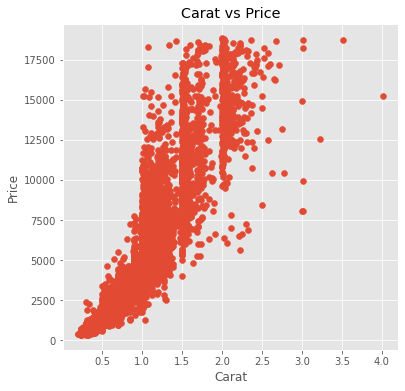

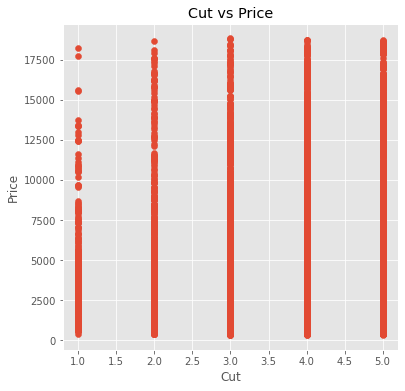

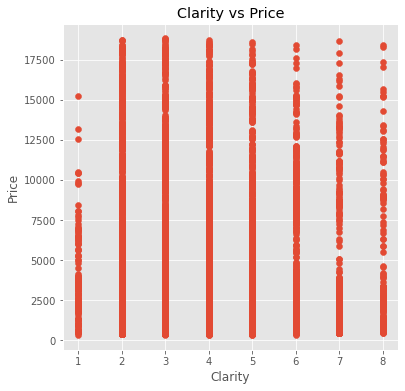

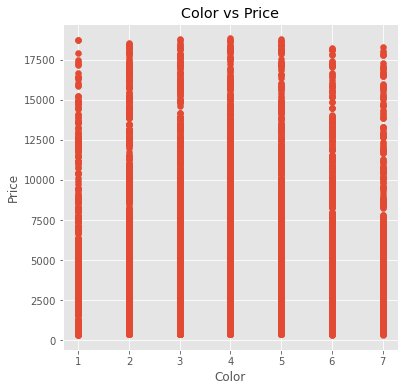

In [233]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(diamonds.get('carat'), diamonds.get('price'))
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(diamonds.get('cut'), diamonds.get('price'))
plt.title('Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(diamonds.get('clarity'), diamonds.get('price'))
plt.title('Clarity vs Price')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(diamonds.get('color'), diamonds.get('price'))
plt.title('Color vs Price')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

# Based on the scatter plots, we can see that 'carat' is most closely connected to the price of a diamond
best_price_indicator = 1


In [234]:
grader.check("q2_7")

q2_7 results: All test cases passed!

**Question 2.8.** Jack asks you to show him the median price of a diamond as the length of the diamond (in mm) increases. Since Jack is more of a visuals type of person, he wants you to show him this trend in a graph. Create a plot that shows the trend of the median price of a diamond as the length of the diamond increases.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_8
manual: True
-->

In [235]:
diamonds['x_rounded'] = diamonds.get('x').round()
median_prices_by_length = diamonds.groupby('x_rounded').median().get(['price'])

plt.figure(figsize=(8, 6))
plt.plot(median_prices_by_length.index, median_prices_by_length['price'])
plt.xlabel('Length (mm)')
plt.ylabel('Median Price')
plt.title('Median Price of a Diamond as the Length Increases')
plt.show()


AttributeError: 'Series' object has no attribute 'round'

<!-- END QUESTION -->



## 3. Game On! 🎮

Here, we'll be working with a dataset taken from [Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) that contains sales information for thousands of video games, including some released this year. In the cell below, we load the dataset in as a DataFrame named `video_games`. Take some time to understand what each column of `video_games` represents, as we haven't provided you with a description of each column.

In [83]:
# Run this cell to load the dataset.
video_games = bpd.read_csv('data/video_game_ratings.csv')
video_games

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...
12630,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


**Question 3.1.** If you look at the `'votes'` column in the DataFrame, you'll notice that there are commas in some of the numbers. For example, in the second row of the DataFrame, the value in the `'votes'` column is `'36,441'`. These commas indicate that the `'votes'` column contains strings, not integers, since Python never displays integers with commas.

Write a function `convert_votes_to_int` that takes in a string `v` as input and outputs `v` as an integer, after removing any commas. 

Then, use your function to update the `'votes'` column in the `video_games` DataFrame so that it contains integers rather than strings. Make sure to "save" your changes in the `video_games` DataFrame!

In [72]:
def convert_votes_to_int(v):
    return int(v.replace(',', ''))

In [88]:
video_games = video_games.assign(votes=video_games.get('votes').apply(convert_votes_to_int))
video_games

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,36441,Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,7610,Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,26328,Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013,"Action, Adventure, Drama",9.7,61103,"Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...
12630,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


In [89]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** You are curious as to whether there is a relationship between the number of votes a game receives and the rating of the game. Create an appropriate plot that shows the relationship between these two variables.

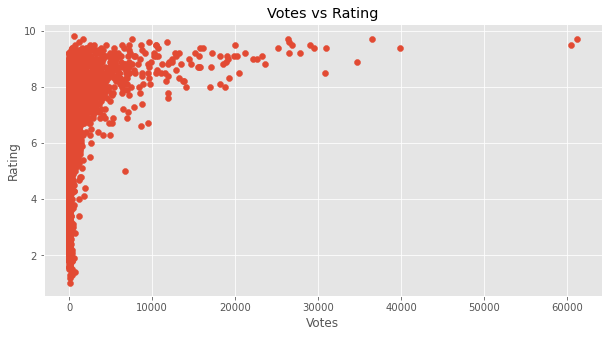

In [93]:
plt.scatter(video_games.get('votes'), video_games.get('rating'))
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Votes vs Rating')
plt.show()

q3_2 = 1


Now, use the plot you made to answer the following question: 

> What type of ratings do video games with a higher number of votes tend to have?

Assign an integer from 1 to 3 representing your answer to the variable `q3_2`.

1. Video games with a higher number of votes tend to have higher ratings.
2. Video games with a higher number of votes tend to have lower ratings.
3. There is no association between number of votes and rating.

In [94]:
q3_2 = 1
q3_2

1

In [95]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Assign `most_common_genres` to a DataFrame that contains the ten most common genres of video games, in descending order. The DataFrame should be indexed by `'genre'` and have only one column, `'count'`, which is the number of video games in that genre.

*Note:* For this question, we will treat each video game as having only one genre. For example, `'Action, Adventure, Drama'` is considered to be its own genre.

In [104]:
most_common_genres = (
    video_games.groupby('genre')
    .count()
    .sort_values(by='title', ascending=False)
    .iloc[:10]
    .drop(columns=['year', 'rating', 'votes', 'directors', 'plot'])
)
most_common_genres = most_common_genres.assign(count=most_common_genres.get('title')).drop(columns=['title'])
most_common_genres

,count
genre,
Action,1402
"Action, Adventure, Fantasy",1329
Sport,789
Adventure,701
"Action, Adventure, Sci-Fi",534
"Action, Sci-Fi",533
"Action, Adventure, Comedy",440
"Action, Adventure, Family",430
"Action, Adventure",381


In [105]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Using the `most_common_genres` DataFrame you created in Question 3.3, create a horizontal bar chart that shows the distribution of video games into these ten genres. Make sure your plot has the most common genre as the top-most bar in the bar chart.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

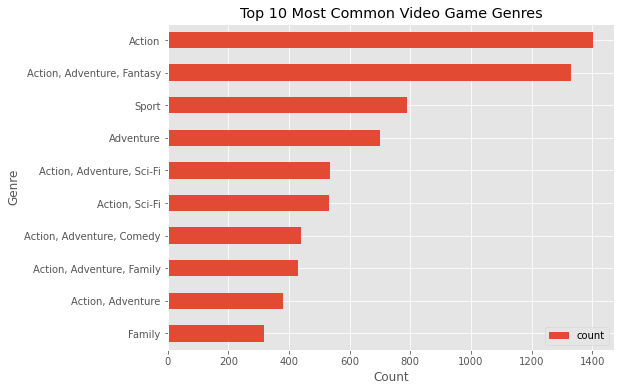

In [107]:
# Create your plot here.
most_common_genres.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Most Common Video Game Genres')
plt.gca().invert_yaxis()
plt.show()


<!-- END QUESTION -->



**Question 3.5.** Assign the variable `third_lowest` to the genre of video games with the third lowest average rating (among all genres, not just the ones you looked at in Questions 3.3 and 3.4).

Do not manually type out your answer. Use `babypandas` methods to produce the answer.

*Note:* Again, we will consider a video game with multiple genres to have only one genre. For example, `'Action, Adventure, Drama'` is considered to be its own genre.

In [109]:
third_lowest = (
    video_games.groupby('genre')
    .mean()
    .sort_values(by='rating', ascending=True)
    .reset_index()
    .loc[2, 'genre']
)
third_lowest


'Animation, Drama, Romance'

In [110]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Create a histogram showing the distribution of video game ratings in the `video_games` DataFrame.

Remember to set `density=True` since we always use density histograms and `ec='w'` to make the separation of the bars more clear. You don't have to set the `bins` argument.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

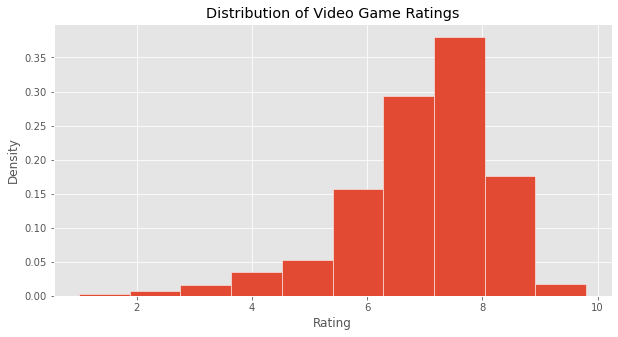

In [124]:
plt.hist(video_games.get('rating'), density=True, ec='w')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Video Game Ratings')
plt.show()

<!-- END QUESTION -->

**Question 3.7.** There is one director who has directed exactly 27 video games **alone** (with no-codirectors).

Below, assign `director_of_27` to the name of this director. Do not manually type out the director's name. Instead, use `babypandas` methods to extract the name.

<!--
BEGIN QUESTION
name: q3_7
-->

In [231]:
director_of_27 = (
    video_games
    .groupby('directors')
    .count()
    .loc[lambda df: df.get('title') == 27]
    .reset_index()
    .get('directors')
    .iloc[0]
)
director_of_27

'Keith Arem'

In [232]:
grader.check("q3_7")

q3_7 results: All test cases passed!

## 4. Let's TED Talk 💡🎤

TED Talks (Technology, Entertainment, and Design) are short, powerful presentations that cover a wide range of topics, delivered by experts in the field. In 2019, a few UCSD Alumni and students were even featured speakers at TEDxUCSD. Over the years, TED Talks have become an important platform for the sharing and culmination of ideas, and are viewed by millions daily. There will even be another TEDxUCSD event this May 2023!

<img src="./images/TED-UCSD.PNG" width=350/>

We have a dataset of TED Talks on YouTube from [Kaggle](https://www.kaggle.com/datasets/purnasaikirank/ted-talks-youtube?resource=download). First, we'll read in the data from a CSV. There is no good index, so we will leave it unset.

In [111]:
ted_data = bpd.read_csv('data/ted_main.csv')
ted_data

,comments,duration,event,main_speaker,title,published_date,ratings,views
0,4553,1164,TED2006,Ken Robinson,Ken Robinson: Do schools kill creativity?,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,265,977,TED2006,Al Gore,Al Gore: Averting the climate crisis,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,124,1286,TED2006,David Pogue,David Pogue: Simplicity sells,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292
3,200,1116,TED2006,Majora Carter,Majora Carter: Greening the ghetto,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550
4,593,1190,TED2006,Hans Rosling,Hans Rosling: The best stats you've ever seen,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869
...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430
2546,6,290,TED2017,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470
2547,10,651,TED2017,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309


**Question 4.1.** You'll notice that the values in the `'published_date'` column are really large integers. It turns out they're stored as Unix timestamps, which measure the number of seconds that have elapsed since midnight on January 1st, 1970. So, January 1st, 1970, at 00:00:00 UTC is time 0. (If you're curious, [this site](https://www.unixtimestamp.com) shows a live "Unix timestamp clock.")

Define a function `timestamp_to_year` that takes a Unix timestamp as input, like the values listed in the DataFrame above, and returns the corresponding year as an integer.

*Note*: Don't worry about leap years or leap seconds here.

In [122]:
def timestamp_to_year(timestamp):
    return int(1970 + timestamp // (60 * 60 * 24 * 365))

timestamp_to_year(1506006095)

2017

In [123]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Use your `timestamp_to_year` function and the `.apply` method to convert all of the timestamps in the `'published_date'` column of `ted_data` into their correct year. Do this without creating an additional column or reordering the existing columns. Assign the resulting DataFrame to the variable name `ted`.

In [179]:
def timestamp_to_year(timestamp):
    return 1970 + timestamp // (60 * 60 * 24 * 365)

ted = ted_data.assign(published_date=ted_data.get('published_date').apply(timestamp_to_year))
ted


,comments,duration,event,main_speaker,title,published_date,ratings,views
0,4553,1164,TED2006,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,265,977,TED2006,Al Gore,Al Gore: Averting the climate crisis,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,124,1286,TED2006,David Pogue,David Pogue: Simplicity sells,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292
3,200,1116,TED2006,Majora Carter,Majora Carter: Greening the ghetto,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550
4,593,1190,TED2006,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869
...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430
2546,6,290,TED2017,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470
2547,10,651,TED2017,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309


In [180]:
grader.check("q4_2")

q4_2 results: All test cases passed!

🚨 **Important**: For the rest of the questions in this section, use the DataFrame `ted` instead of `ted_data`.

**Question 4.3.** 
Define a function named `clean_title` that takes as input a string from the `'title'` column of `ted` and returns the title of the TED talk, without the speaker's name included. Example behavior is shown below.

```py
>>> clean_title('Ken Robinson: Do schools kill creativity?')
'Do schools kill creativity?'
```

Once you have created the function, use the `.apply` method to apply the function on all elements of the `'title'` column in `ted`. Do not create a new column or a new DataFrame.


_*Hint*_: The string method [`.split`](https://docs.python.org/3/library/stdtypes.html#str.split) will be helpful.

In [183]:
def clean_title(title):
    split_title = title.split(': ')
    if len(split_title) > 1:
        return split_title[1]
    else:
        return split_title[0]

ted = ted.assign(title=ted.get('title').apply(clean_title))

# Test cases for your own reference. Feel free to test out more!
print(clean_title('Ken Robinson: Do schools kill creativity?'))  # Should print 'Do schools kill creativity?'
print(clean_title("Hans Rosling: The best stats you've ever seen")) # Should print 'The best stats you've ever seen'


Do schools kill creativity?
The best stats you've ever seen


In [184]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** We'll say a talk's title is a question if the character `'?'` appears anywhere in the title. Add a column to `ted` named `'is_question'` that contains the value `True` for talks whose titles are questions and `False` for talks whose titles aren't questions. Save the resulting DataFrame as `ted_with_question`; **don't** modify the current `ted` DataFrame, otherwise you may start to fail some test cases you're currently passing.

*Hint*: If you try and check whether a title contains `'?'` using the same method you used in Question 1.6, you'll run into an error. Instead of using just `'?'`, you'll need to use `'\?'`. When using the Series method from Question 1.6, the `'?'` is interpreted as a special character; by using `'\?'` as the input to that Series method, we're telling Python to find all titles that contain a literal question mark. (If you're curious, the technical term for this is "escaping" the `'?'` character.)

In [189]:
def is_question(title):
    return '?' in title

ted_with_question = ted.assign(is_question=ted.get('title').apply(is_question))

# Test cases for your own reference. Feel free to test out more!
print(ted_with_question)

      comments  duration         event         main_speaker  \
0         4553      1164       TED2006         Ken Robinson   
1          265       977       TED2006              Al Gore   
2          124      1286       TED2006          David Pogue   
3          200      1116       TED2006        Majora Carter   
4          593      1190       TED2006         Hans Rosling   
...        ...       ...           ...                  ...   
2545        17       476       TED2017     Duarte Geraldino   
2546         6       290       TED2017  Armando Azua-Bustos   
2547        10       651       TED2017       Radhika Nagpal   
2548        32      1100  TEDxMileHigh     Theo E.J. Wilson   
2549         8       519       TED2017    Karoliina Korppoo   

                                                  title  published_date  \
0                           Do schools kill creativity?            2006   
1                           Averting the climate crisis            2006   
2                 

In [190]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** Using the `'is_question'` column that you created in Question 4.4, calculate the mean number of views for titles that are questions and for titles that are not questions. Store the result for titles with a question in a variable called `mean_views_with_question`, and the result for titles without a question in a variable called `mean_views_without_question`.

In [203]:
mean_views_with_question = ted_with_question[ted_with_question.get('is_question')].get('views').mean()
mean_views_without_question = ted_with_question[~ted_with_question.get('is_question')].get('views').mean()

print('Average views of talks with questions in the title:', mean_views_with_question)
print('Average views of talks without questions in the title:', mean_views_without_question)


Average views of talks with questions in the title: 1969743.3883495145
Average views of talks without questions in the title: 1674441.7406143346


In [204]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6.** Create a horizontal bar chart that displays the mean views for each of the **top 20 TED Talk events** in the dataset. Sort the bars so that the event with the highest mean views appears at the very top, and the event with the lowest mean views appears at the very bottom.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_6
manual: true

-->

In [216]:
# Question 4.6.
mean_views_per_event = ted_with_question.groupby('event').agg({'views': 'mean'}).sort_values('views', ascending=False).head(20)
mean_views_per_event.plot(kind='barh', y='views', title='Mean views of top 20 TED Talk events', legend=False)


AttributeError: 'DataFrameGroupBy' object has no attribute 'agg'

<!-- END QUESTION -->



So far, we haven't used the `'ratings'` column in `ted_with_question` at all for our analysis. The values in the `'ratings'` column appear to be formatted strangely:

In [207]:
first_rating_string = ted_with_question.get('ratings').iloc[0]
first_rating_string

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [208]:
type(first_rating_string)

str

If we look closely, we see that each value in the `'ratings'` column looks like a list of dictionaries! While these values _look_ like lists, they are actually strings.

Conveniently, it turns out there's a function built into Python called `eval` that takes in a string that contains a Python expression and evaluates that expression. We use it below.

In [209]:
eval("np.array([1, 2, 3]) + np.array([4, 5, 6])")

array([5, 7, 9])

In [210]:
eval("ted.shape[0]")

2550

In the two examples above, `eval` seemed to make things more complicated, not less complicated. However, `eval` can help turn the values in the `'ratings'` column, which are strings (of lists, of dictionaries), to actual lists.

For example:

In [211]:
first_rating_list = eval(first_rating_string)
first_rating_list

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [212]:
type(first_rating_list)

list

Now it's a bit more clear as to how these lists are formatted. Each individual dictionary corresponds to a different tag that a video received, e.g. `'Funny'` or `'Persuasive'`. The associated `'count'` values represent the number of votes, or ratings, that video received for the corresponding tag. For instance, the first talk in the dataset received 10704 votes for the `'Persuasive'` tag.

Below, we've defined a function that takes in a single value from the `'ratings'` column and returns a single dictionary (not a list of dictionaries) corresponding to the most common tag for that video. You don't need to understand how the function works.

In [213]:
def most_common_tag_dict(rating_str):
    rating_list = eval(rating_str)
    rating_list_sorted = sorted(rating_list, key=lambda x: x['count'])
    return rating_list_sorted[-1]

For example, in the string below, the tag with the most votes is `'Inspiring'`:

In [214]:
first_rating_string

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

And so:

In [215]:
most_common_tag_dict(first_rating_string)

{'id': 10, 'name': 'Inspiring', 'count': 24924}

**Question 4.7.** Complete the implementation of the function `most_common_tag_name`, which takes in a value from the `'ratings'` column of `ted_with_question` and returns the name of the most common tag as a string. For instance, `most_common_tag_name(first_rating_string)` should return `'Inspiring'`.

Then, assign `ted_final` to a DataFrame with all of the same columns as `ted_with_question`, with an additional column named `'most_common_tag'` containing the most common tag name for each talk.

_*Hint*_: Most of the work has already been done for you – you should use `most_common_tag_dict` in your implementation of `most_common_tag_name`.

In [217]:
def most_common_tag_name(rating_string):
    return most_common_tag_dict(rating_string)['name']

ted_final = ted_with_question.assign(most_common_tag=ted_with_question.get('ratings').apply(most_common_tag_name))
ted_final

,comments,duration,event,main_speaker,title,published_date,ratings,views,is_question,most_common_tag
0,4553,1164,TED2006,Ken Robinson,Do schools kill creativity?,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,True,Inspiring
1,265,977,TED2006,Al Gore,Averting the climate crisis,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,False,Funny
2,124,1286,TED2006,David Pogue,Simplicity sells,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,False,Funny
3,200,1116,TED2006,Majora Carter,Greening the ghetto,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,False,Inspiring
4,593,1190,TED2006,Hans Rosling,The best stats you've ever seen,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,False,Informative
...,...,...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,What we're missing in the debate about immigra...,2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430,False,Informative
2546,6,290,TED2017,Armando Azua-Bustos,The most Martian place on Earth,2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470,False,Informative
2547,10,651,TED2017,Radhika Nagpal,What intelligent machines can learn from a sch...,2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647,False,Informative
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,A black man goes undercover in the alt-right,2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309,False,Inspiring


In [218]:
grader.check("q4_7")

q4_7 results: All test cases passed!

**Question 4.8.** Finally, create a plot that depicts the distribution of the `'most_common_tag'` column.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_8
manual: true
-->

<AxesSubplot:title={'center':'Distribution of Most Common Tags'}, xlabel='most_common_tag'>

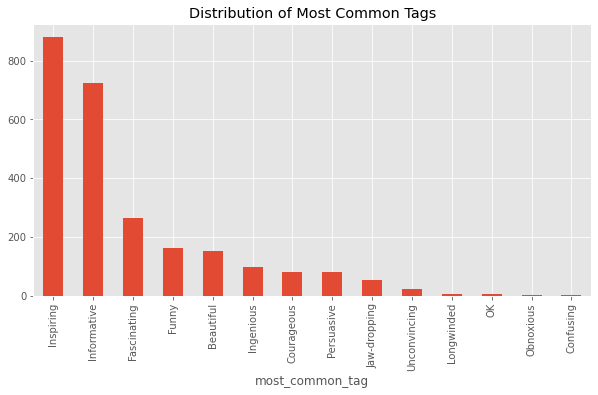

In [219]:
tag_distribution = ted_final.groupby('most_common_tag').count().sort_values('title', ascending=False)
tag_distribution.plot(kind='bar', y='title', title='Distribution of Most Common Tags', legend=False)

<!-- END QUESTION -->



Are you inspired? What would you give a talk about at TEDxUCSD if given a chance?

If you're curious, in the cell below, create a plot that depicts the average number of views each `'most_common_tag'` received. Which `'most_common_tag'` is the most popular, on average? 😱

<AxesSubplot:title={'center':'Average Views per Most Common Tag'}, xlabel='most_common_tag'>

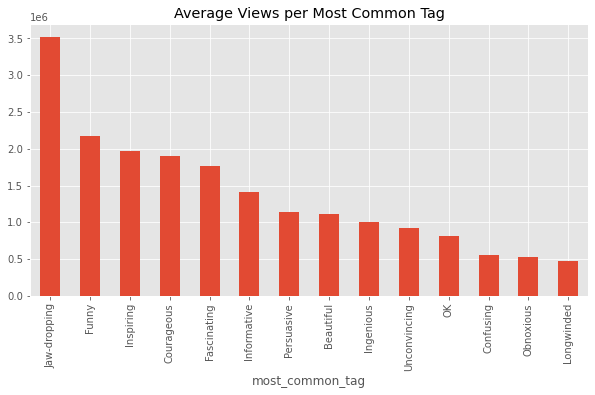

In [221]:
average_views_per_tag = ted_final.groupby('most_common_tag').mean().get(['views']).sort_values('views', ascending=False)
average_views_per_tag.plot(kind='bar', y='views', title='Average Views per Most Common Tag', legend=False)

<div class="alert alert-block alert-danger">
    In this question, we used the Python <code>eval</code> function out of necessity. In general, it's a good idea to <b>avoid</b> the <code>eval</code> function. This is because it's possible to call it on an input that looks safe, but contains malicious code. If you're really curious, watch starting around 9 minutes in <a href="https://podcast.ucsd.edu/watch/wi23/dsc80_a00/15">this video</a> – you can see an example from another data science course where we call the <code>eval</code> function and lose all of our files!
</div>

## 5. Final Stretch 🧘‍♀️

Suppose we have a DataFrame called `data` with two numerical columns, `'x'` and `'y'`. Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

<img src="images/q4_scatter_plot.png" width=400/>

Now consider these two histograms:

<center>
    <table><tr>
        <td><center><b>Histogram A</b><br> <img src="images/q4_histogram_one.png" width=400></center> </td>
        <td><center><b>Histogram B</b><br> <img src="images/q4_histogram_two.png" width=400></center> </td>
    </tr></table>
</center>

**Question 5.1.** Which of the following lines of code generated **Histogram B**? Assign either `1`, `2`, `3`, or `4` to `which_code`.
 1. `data.plot(kind='hist', density=False, y='x')`
 2. `data.plot(kind='hist', density=False, y='y')` 
 3. `data.plot(kind='hist', density=True, y='x')`
 4. `data.plot(kind='hist', density=True, y='y')`

In [222]:
which_code = 2

In [223]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** Suppose we run this block of code:

```py
new_data = bpd.DataFrame().assign(
    x = data.get('x') / 3,
    y = data.get('y')
)
```
    
We then run 

`new_data.plot(kind='hist', density=True, y='x')`.

How will this histogram look compared to the histogram created by 

`data.plot(kind='hist', density=True, y='x')`, 

assuming both histograms are drawn on the same axes? Assign `histogram_difference` to either 1, 2, 3, or 4, corresponding to your choice.

1. The `new_data` histogram will be narrower and taller than the `data` histogram.
2. The `new_data` histogram will be narrower and shorter than the `data` histogram.
3. The `new_data` histogram will be wider and taller than the `data` histogram.
4. The `new_data` histogram will be wider and shorter than the `data` histogram.

_*Hint*_: Look at the end of [Lecture 7](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-overlaid-histograms) for an example of two histograms drawn on the same axes.

In [224]:
histogram_difference = 1

In [225]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Below, we show Histogram A again.

<img src="./images/q4_histogram_one.png" width=400/>

What **percent** of values in Histogram A are between -2 (inclusive) and 0 (exclusive)? While we cannot answer this question exactly since we do not know where the bins start and end, we can still approximate the answer. Assign the variable `percent_between` to a number 1 through 5, corresponding to the closest answer.

1. 22% 
2. 27% 
3. 34%
4. 41%
5. 48%

In [226]:
percent_between = 3

In [227]:
grader.check("q5_3")

q5_3 results: All test cases passed!

## Finish Line 

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

With homeworks, unlike with labs, the grade you see on Gradescope is **not your final score**. We will run correctness tests after the assignment's due date has passed.

In [228]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results:
    q2_7 - 1 result:
        Trying:
            best_price_indicator in [1, 2, 3, 4]
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_7 0
        Failed example:
            best_price_indicator in [1, 2, 3, 4]
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              